# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

## Split Dataset

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((23924, 39, 39), (5982, 39, 39))

## Convert 2D dataset to a 1D vector

In [14]:
batchSize=128
num_classes=8
epochs=100
imageRows, imageCols =39,39

In [15]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [16]:
input_shape

(39, 39, 1)

In [17]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [18]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [21]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 23924 samples, validate on 5982 samples
Epoch 1/100
23924/23924 [==============================] - 27s 1ms/step - loss: 2.2739 - acc: 0.7416 - val_loss: 1.7673 - val_acc: 0.8084
Epoch 2/100
23924/23924 [==============================] - 22s 913us/step - loss: 1.2331 - acc: 0.9199 - val_loss: 1.0927 - val_acc: 0.9064
Epoch 3/100
23924/23924 [==============================] - 22s 911us/step - loss: 0.8097 - acc: 0.9495 - val_loss: 0.7586 - val_acc: 0.9313
Epoch 4/100
23924/23924 [==============================] - 22s 912us/step - loss: 0.5859 - acc: 0.9627 - val_loss: 0.6279 - val_acc: 0.9328
Epoch 5/100
23924/23924 [==============================] - 22s 911us/step - loss: 0.4614 - acc: 0.9676 - val_loss: 0.5949 - val_acc: 0.9142
Epoch 6/100
23924/23924 [==============================] - 22s 915us/step - loss: 0.3885 - acc: 0.9737 - val_loss: 0.4599 - val_acc: 0.9371
Epoch 7/100
23924/23924 [==============================] - 22s 912us/step - loss: 0.3453 - acc: 0.9751 - val_loss

Epoch 59/100
23924/23924 [==============================] - 23s 944us/step - loss: 0.1352 - acc: 0.9891 - val_loss: 0.2180 - val_acc: 0.9647
Epoch 60/100
23924/23924 [==============================] - 23s 943us/step - loss: 0.1292 - acc: 0.9906 - val_loss: 0.2566 - val_acc: 0.9537
Epoch 61/100
23924/23924 [==============================] - 23s 942us/step - loss: 0.1289 - acc: 0.9911 - val_loss: 0.2410 - val_acc: 0.9632
Epoch 62/100
23924/23924 [==============================] - 22s 939us/step - loss: 0.1247 - acc: 0.9913 - val_loss: 0.3510 - val_acc: 0.9475
Epoch 63/100
23924/23924 [==============================] - 22s 939us/step - loss: 0.1235 - acc: 0.9922 - val_loss: 0.1650 - val_acc: 0.9798
Epoch 64/100
23924/23924 [==============================] - 22s 939us/step - loss: 0.1207 - acc: 0.9922 - val_loss: 0.1833 - val_acc: 0.9731
Epoch 65/100
23924/23924 [==============================] - 22s 939us/step - loss: 0.1141 - acc: 0.9929 - val_loss: 0.2852 - val_acc: 0.9453
Epoch 66/100


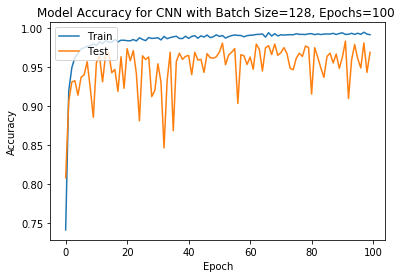

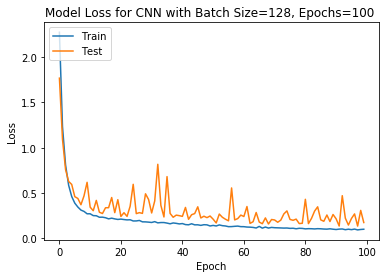

In [22]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [24]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    98.949331   0.007295   0.110225   0.060274   0.438823    0.274097   
Bengali      0.000462  99.757600   0.001879   0.145383   0.000666    0.000932   
Kannada      0.003339   0.012470  99.553877   0.228280   0.001163    0.170712   
Malayalam    0.007143   3.024234   0.403321  95.381212   0.043942    0.255990   
Punjabi      0.011501   0.000511   0.004905   0.000541  99.959713    0.003165   
Rajasthani   0.004737   0.003744   0.065286   0.031335   0.087363   99.669492   
Tamil        0.003846   0.340013   0.117081   0.176226   0.002972    0.367359   
Telugu       0.035346   0.019554   1.244343   0.524956   0.096195    2.642622   

columns         Tamil     Telugu  
rows                              
Assamese     0.023327   0.138312  
Bengali      0.092887   0.000344  
Kannada      0.02

In [25]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    98.830575   0.009964   0.065687   0.142068   0.404165    0.323258   
Bengali      0.001193  97.002012   0.006298   2.447707   0.001519    0.063121   
Kannada      0.050535   0.044269  97.867781   1.405494   0.012840    0.379354   
Malayalam    0.017868   6.921861   1.521360  86.783934   0.012194    0.465252   
Punjabi      0.016084   0.001449   0.130330   0.001404  99.763125    0.021049   
Rajasthani   0.007691   0.005579   0.392907   0.197515   0.025270   98.590869   
Tamil        0.006230   1.141625   0.413353   1.565980   0.005914    0.457587   
Telugu       0.065651   0.020791   1.149852   1.126596   0.278834    4.565233   

columns         Tamil     Telugu  
rows                              
Assamese     0.125476   0.098927  
Bengali      0.476636   0.001547  
Kannada      0.181